# ZS Data Scientist Challenge
### Predict Sentiments of Tweets
---
#### by Seung Chi (seungyoonchi@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [5]:
train = pd.read_csv('train.csv')

In [152]:
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,1,0.0000,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,1,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,1,0.0000,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,1,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,1,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 12 columns):
tweet_id                        3339 non-null object
airline_sentiment               3339 non-null object
airline_sentiment_confidence    3339 non-null float64
negativereason                  2134 non-null object
negativereason_confidence       2450 non-null float64
airline                         3338 non-null object
name                            3338 non-null object
retweet_count                   3338 non-null float64
text                            3338 non-null object
tweet_created                   3243 non-null object
tweet_location                  2319 non-null object
user_timezone                   2231 non-null object
dtypes: float64(3), object(9)
memory usage: 313.1+ KB


### Exploratory Data Analysis
---

In [7]:
train[['airline_sentiment_confidence','negativereason_confidence','retweet_count']].describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,3339.000000,2450.000000,3338.000000
mean,0.896748,0.618021,0.106052
std,0.165675,0.326748,0.350716
min,0.335000,0.000000,0.000000
25%,0.688950,0.355525,0.000000
50%,1.000000,0.666850,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,4.000000


In [8]:
sentiment_count = train.groupby('airline_sentiment')['tweet_id'].nunique().sort_values(ascending=False)
sentiment_count

airline_sentiment
negative    2135
neutral      679
positive     525
Name: tweet_id, dtype: int64

In [9]:
# Sentiment count as Percentage
sentiment_count/3339*100

airline_sentiment
negative    63.94130
neutral     20.33543
positive    15.72327
Name: tweet_id, dtype: float64

> Mostly negative sentiment; ~64%

In [10]:
reason_count = train.groupby('negativereason')['tweet_id'].nunique().sort_values(ascending=False)
reason_count

negativereason
Customer Service Issue         563
Late Flight                    412
Can't Tell                     304
Lost Luggage                   207
Bad Flight                     177
Cancelled Flight               158
Flight Attendant Complaints    132
Flight Booking Problems        121
longlines                       42
Damaged Luggage                 18
Name: tweet_id, dtype: int64

In [79]:
# Replace negativereason column to 1 for reason and 0 for NaN
# Fill na for negativereason_confidence with 0 value
train['negativereason'] = train['negativereason'].notnull().astype('int')
train['negativereason_confidence'] = train['negativereason_confidence'].fillna(value=0)
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,1,0.0000,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,1,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,1,0.0000,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,1,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,1,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
air_count = train.groupby('airline')['tweet_id'].nunique().sort_values(ascending=False)
air_count

airline
United            2884
Virgin America     454
Name: tweet_id, dtype: int64

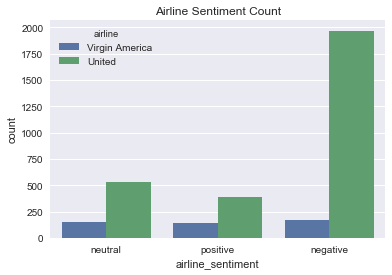

In [12]:
plt.title('Airline Sentiment Count')
sns.countplot(x='airline_sentiment', hue='airline', data=train)
plt.show()

> United has an overwhelming, overall negative sentiment ratio compared to Virgin America, which has an even spread across sentiments.

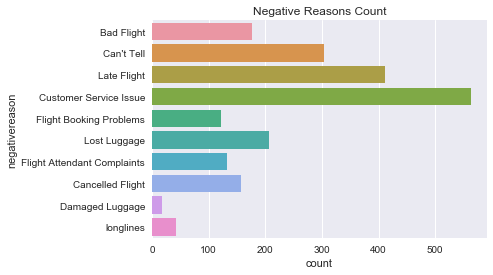

In [13]:
plt.title('Negative Reasons Count')
sns.countplot(y='negativereason', data=train)
plt.show()

> Negative reasons count can be used to assess what factors these airlines can work on improving for a more positive customer experience.

### Cleaning Data
---

In [153]:
# Drop tweet_id, airline, name, tweet_location, user_timezone, retweet_count, tweet_created
df = train.drop(['tweet_id','airline','name','tweet_location','user_timezone',\
                 'retweet_count','tweet_created'], axis=1)

In [154]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0000,1,0.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,1,0.0000,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,1,0.0000,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,1,0.7033,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,1,1.0000,@VirginAmerica and it's a really big bad thing...


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 4 columns):
airline_sentiment               3339 non-null object
airline_sentiment_confidence    3339 non-null float64
negativereason                  3339 non-null int32
text                            3338 non-null object
dtypes: float64(1), int32(1), object(2)
memory usage: 91.4+ KB


In [17]:
df[df.text.isnull()]

,airline_sentiment,text
3338,negative,NaN


In [155]:
df = df.drop([3338])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3337
Data columns (total 5 columns):
airline_sentiment               3338 non-null object
airline_sentiment_confidence    3338 non-null float64
negativereason                  3338 non-null int32
negativereason_confidence       3338 non-null float64
text                            3338 non-null object
dtypes: float64(2), int32(1), object(2)
memory usage: 143.4+ KB


> Drop 1 null text value

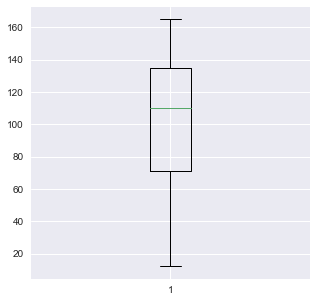

In [19]:
df['pre_clean_len'] = [len(t) for t in df.text]

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

> Checking text for tweets over 140 characters for irregularities, possibly for cleaning.

In [20]:
df[df.pre_clean_len > 140].head(10)

,airline_sentiment,text,pre_clean_len
26,negative,@VirginAmerica hi! I just bked a cool birthday...,156
75,negative,@VirginAmerica I have no interesting flying wi...,146
82,negative,@VirginAmerica I like the TV and interesting v...,149
83,negative,"@VirginAmerica just landed in LAX, an hour aft...",147
90,negative,@VirginAmerica why must a traveler miss a flig...,145
93,negative,@VirginAmerica your no Late Flight bag check j...,142
105,positive,@VirginAmerica is the best airline I have flow...,144
143,negative,@VirginAmerica having problems Flight Booking ...,147
147,negative,@VirginAmerica our flight into lga was Cancell...,149
176,negative,@VirginAmerica Because we never rec'd Cancelle...,150


In [173]:
df.loc[26].text

"@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢"

In [177]:
df.loc[90].text

'@VirginAmerica why must a traveler miss a flight to Late Flight check a bag?  I missed my morning appointments and you lost my business. #sfo2lax'

> Nothing out of the ordinary for the texts. However, will proceed cleaning of text data.

In [26]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import re

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    #Removing patterns: @, https, www
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x in tok.tokenize(letters_only) if len(x) > 1]

    return (" ".join(words)).strip()

In [156]:
df_clean = df.copy()
df_clean['text'] = df['text'].apply(tweet_cleaner)
df_clean.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0000,1,0.0000,what said
1,positive,0.3486,1,0.0000,plus you ve added commercials to the experienc...
2,neutral,0.6837,1,0.0000,did not today must mean need to take another trip
3,negative,1.0000,1,0.7033,it really aggressive to blast obnoxious entert...
4,negative,1.0000,1,1.0000,and it really big bad thing about it


### CountVectorizer for term frequency
---

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
cvec.fit(df_clean.text)

neg_doc_matrix = cvec.transform(df_clean[df_clean.airline_sentiment == 'negative'].text)
pos_doc_matrix = cvec.transform(df_clean[df_clean.airline_sentiment == 'positive'].text)
neu_doc_matrix = cvec.transform(df_clean[df_clean.airline_sentiment == 'neutral'].text)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neu_tf = np.sum(neu_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neu = np.squeeze(np.asarray(neu_tf))

term_freq_df = pd.DataFrame([neg,pos,neu],columns=cvec.get_feature_names()).transpose()

In [97]:
term_freq_df.columns = ['negative','positive','neutral']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive'] + term_freq_df['neutral']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,neutral,total
to,1333,215,363,1911
the,961,207,192,1360
you,660,200,186,1046
for,557,156,146,859
flight,631,90,132,853
and,621,95,80,796
not,669,40,77,786
on,568,80,138,786
my,558,77,109,744
is,503,55,113,671


In [98]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5146 entries, aa to zz
Data columns (total 4 columns):
negative    5146 non-null int64
positive    5146 non-null int64
neutral     5146 non-null int64
total       5146 non-null int64
dtypes: int64(4)
memory usage: 201.0+ KB


> Lot of stop words in the top. Since tweets are informal and short, I will test the original data and ones cleaned without stop words.

### Predictive Modeling
---

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix

In [159]:
def cv_model_performance(df, title, ngram_range=(1), stop_words=None):
    """Tests RandomForestClassifier, LinearSVC, MultinomialNB, LogisticRegression models
        for input DataFrame with ngram range and stop_words parameters.
        Outputs graph with model performances and averages."""
    
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
    tfidf_text = tfidf.fit_transform(df.text)
    features = hstack([tfidf_text, df[['airline_sentiment_confidence','negativereason']]]).toarray()
    labels = df.airline_sentiment
    
    models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=8282),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=8282),
    ]
    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

    plt.title(title)
    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    plt.show()
    
    print(cv_df.groupby('model_name').accuracy.mean())

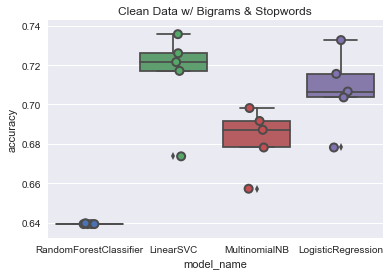

model_name
LinearSVC                 0.714812
LogisticRegression        0.707325
MultinomialNB             0.682454
RandomForestClassifier    0.639305
Name: accuracy, dtype: float64


In [190]:
cv_model_performance(df_clean, title='Clean Data w/ Bigrams & Stopwords', ngram_range=(1,2), stop_words='english')

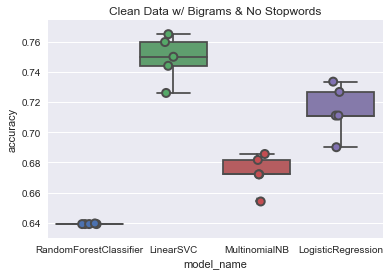

model_name
LinearSVC                 0.748958
LogisticRegression        0.714507
MultinomialNB             0.673163
RandomForestClassifier    0.639305
Name: accuracy, dtype: float64


In [166]:
cv_model_performance(df_clean, title='Clean Data w/ Bigrams & No Stopwords', ngram_range=(1,2))

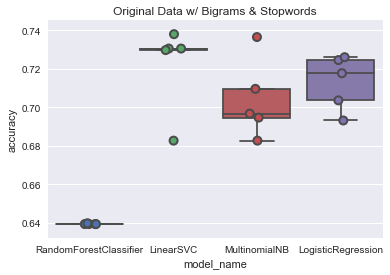

model_name
LinearSVC                 0.722293
LogisticRegression        0.713005
MultinomialNB             0.704010
RandomForestClassifier    0.639305
Name: accuracy, dtype: float64


In [147]:
cv_model_performance(df, title='Original Data w/ Bigrams & Stopwords', ngram_range=(1,2), stop_words='english')

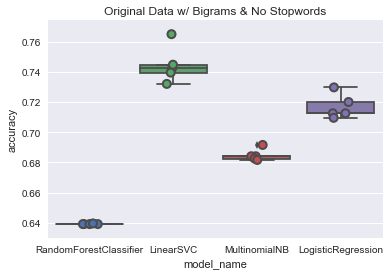

model_name
LinearSVC                 0.744757
LogisticRegression        0.716904
MultinomialNB             0.684839
RandomForestClassifier    0.639305
Name: accuracy, dtype: float64


In [148]:
cv_model_performance(df, title='Original Data w/ Bigrams & No Stopwords', ngram_range=(1,2))

> Best performer is LinearSVC with Bigrams, and no Stopwords removed. Will use Cleaned Data.

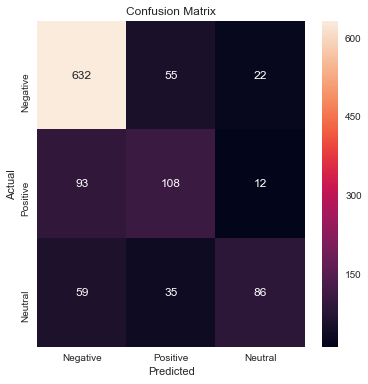

In [184]:
# Best Model for Cleaned DataFrame
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
tfidf_fit = tfidf.fit(df_clean.text)
tfidf_text = tfidf.transform(df_clean.text)
features = hstack([tfidf_text, df_clean[['airline_sentiment_confidence','negativereason']]]).toarray()
labels = df_clean.airline_sentiment

model = LinearSVC()

# Confusion Matrix
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=8282)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
labels=['Negative','Positive','Neutral']

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Applying model to test.csv for Final Submission CSV
---

In [2]:
test = pd.read_csv('test.csv')
test.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Test_tweet_1,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
1,Test_tweet_2,0.6769,NaN,0.0,Virgin America,idk_but_youtube,0,@VirginAmerica did you know that suicide is th...,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
2,Test_tweet_3,0.6451,NaN,NaN,Virgin America,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,2015-02-24 10:21:28 -0800,NaN,Eastern Time (US & Canada)
3,Test_tweet_4,1.0000,Bad Flight,1.0,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
4,Test_tweet_5,0.6578,NaN,0.0,Virgin America,KGervaise,0,@VirginAmerica I have an unused ticket but mov...,2015-02-23 16:20:38 -0800,Georgia,Pacific Time (US & Canada)


In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
tweet_id                        371 non-null object
airline_sentiment_confidence    371 non-null float64
negativereason                  254 non-null object
negativereason_confidence       289 non-null float64
airline                         371 non-null object
name                            371 non-null object
retweet_count                   371 non-null int64
text                            371 non-null object
tweet_created                   361 non-null object
tweet_location                  260 non-null object
user_timezone                   248 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 32.0+ KB


In [6]:
train.negativereason_confidence.describe()

count    2450.000000
mean        0.618021
std         0.326748
min         0.000000
25%         0.355525
50%         0.666850
75%         1.000000
max         1.000000
Name: negativereason_confidence, dtype: float64

In [4]:
test.negativereason_confidence.describe()

count    289.000000
mean       0.651909
std        0.325789
min        0.000000
25%        0.370500
50%        0.673800
75%        1.000000
max        1.000000
Name: negativereason_confidence, dtype: float64

In [170]:
# Replace negativereason column to 1 for reason and 0 for NaN
test['negativereason'] = train['negativereason'].notnull().astype('int')
test.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Test_tweet_1,0.6340,1,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
1,Test_tweet_2,0.6769,1,0.0,Virgin America,idk_but_youtube,0,@VirginAmerica did you know that suicide is th...,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
2,Test_tweet_3,0.6451,1,NaN,Virgin America,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...,2015-02-24 10:21:28 -0800,NaN,Eastern Time (US & Canada)
3,Test_tweet_4,1.0000,1,1.0,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
4,Test_tweet_5,0.6578,1,0.0,Virgin America,KGervaise,0,@VirginAmerica I have an unused ticket but mov...,2015-02-23 16:20:38 -0800,Georgia,Pacific Time (US & Canada)


In [171]:
test_df = test.drop(['tweet_id','airline','name','retweet_count','tweet_created','tweet_location',\
                     'user_timezone','negativereason_confidence'], axis=1)
test_df.head()

,airline_sentiment_confidence,negativereason,text
0,0.6340,1,@VirginAmerica Really missed a prime opportuni...
1,0.6769,1,@VirginAmerica did you know that suicide is th...
2,0.6451,1,@VirginAmerica @virginmedia I'm flying your #f...
3,1.0000,1,@VirginAmerica I flew from NYC to SFO last we...
4,0.6578,1,@VirginAmerica I have an unused ticket but mov...


In [185]:
tfidf_test_text = tfidf_fit.transform(test_df.text)
features_test = hstack([tfidf_test_text, \
                        test_df[['airline_sentiment_confidence','negativereason']]]).toarray()
y_pred = model.predict(features_test)

In [186]:
# Final Submission
final = pd.DataFrame(test['tweet_id'])
final['airline_sentiment'] = y_pred
final = final.set_index('tweet_id')

final.head()

,airline_sentiment
tweet_id,
Test_tweet_1,negative
Test_tweet_2,neutral
Test_tweet_3,neutral
Test_tweet_4,negative
Test_tweet_5,negative


In [187]:
# Score for Cleaned Data
final.to_csv('predictions_clean.csv')